# Population Level Comparisons

Both PCA and the treelet decomposition are functions of the variance-covaraince matrix only. We can apply both directly to the population level matrices to see which models are identifiable. 

## Setup

In [2]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.linalg import block_diag
from scipy.linalg import toeplitz
import numpy as np 
import pandas as pd
import sys
import os

In [3]:
sys.path.append("../scripts")
import python_treelet_implementation as pytree
import test_treelets_mixture_models as ttmm
import utils

## Uncorrelated factors and non-overlapping loading vectors 

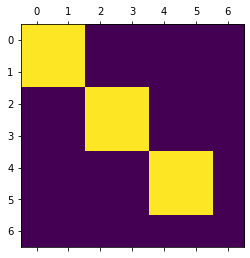

In [4]:
A = B = C = np.ones((2,2))
D = np.zeros(1)
noiseless_matrix = block_diag(A,B,C,D)

plt.matshow(noiseless_matrix)

### PCA 

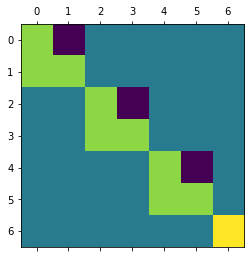

In [5]:
eigen_vectors = np.linalg.eig(noiseless_matrix)[1]
real_valued_eigen = np.real(eigen_vectors)
plt.matshow(real_valued_eigen)

### Treelet decomposition

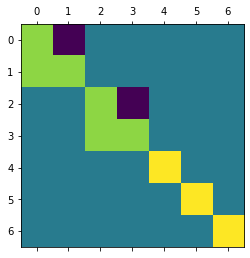

In [42]:
tree = pytree.treelet_decomposition(X = noiseless_matrix, 
                                    L = 7)
basis = tree[3]["B"]
plt.matshow(basis)

## Correlated factors and non-overlapping loading vectors 

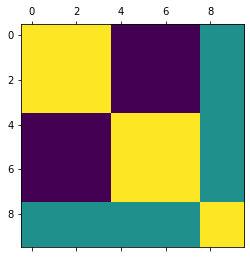

In [28]:
C11 = C22 = 2*np.ones((4,4))
C33 = 2*np.ones((2,2))
C32 = np.ones((2,4))

noiseless_matrix = np.block([[C11, np.zeros((4,4)), C32.T],
                             [np.zeros((4,4)), C22, C32.T],
                             [C32,C32,C33]])

plt.matshow(noiseless_matrix)

## PCA 

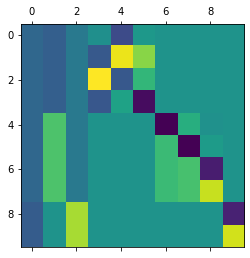

In [29]:
eigen_vectors = np.linalg.eig(noiseless_matrix)[1]
real_valued_eigen = np.real(eigen_vectors)
plt.matshow(real_valued_eigen)

### Treelet decomposition

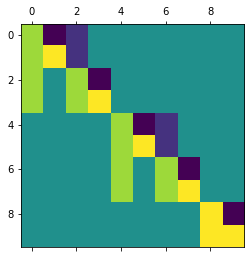

In [34]:
tree = pytree.treelet_decomposition(X = noiseless_matrix, 
                                    L = 10)
basis = tree[7]["B"]
plt.matshow(basis)